In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Datasets/train.csv')

In [3]:
df

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,MAGIC_KEY,BOX_COUNT
0,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2BC4127366C,1
1,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2BC4394CE95,1
2,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2BC4D37C804,1
3,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2BC4EA26F92,1
4,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2BC4F73408A,1
...,...,...,...,...,...,...,...,...
1048931,288,Standard,Home Delivery - Digital Payment,0.0,3.6,15.96,28E5FB5E7BF,1
1048932,288,Standard,Home Delivery - Digital Payment,0.0,3.6,15.96,293C58DD9DC,1
1048933,288,Standard,Home Delivery - Digital Payment,0.0,3.6,15.96,29E6A06C99B,1
1048934,288,Standard,Home Delivery - Digital Payment,0.0,3.6,15.96,2A0CABFA0DF,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048936 entries, 0 to 1048935
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   BOX_ID           1048936 non-null  int64  
 1   QUALITY          1048936 non-null  object 
 2   DELIVERY_OPTION  1048936 non-null  object 
 3   MILK             1048936 non-null  float64
 4   MEAT             1048936 non-null  float64
 5   UNIT_PRICE       1048936 non-null  float64
 6   MAGIC_KEY        1048936 non-null  object 
 7   BOX_COUNT        1048936 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 64.0+ MB


In [5]:
df.head()

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,MAGIC_KEY,BOX_COUNT
0,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2BC4127366C,1
1,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2BC4394CE95,1
2,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2BC4D37C804,1
3,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2BC4EA26F92,1
4,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2BC4F73408A,1


In [6]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder() #creating an instance of that encoder

In [7]:
rank = ['Standard', 'Premium'] #defining the rank or order
oe = OrdinalEncoder(categories = [rank]) #creating another instance using custom rank
df['QUALITY'] = oe.fit_transform(df[['QUALITY']]) #encoding the column

In [8]:
rank = ['Home Delivery - Digital Payment', 'Home Delivery - CoD', 'Delivery from Collection Point'] #defining the rank or order
oe = OrdinalEncoder(categories = [rank]) #creating another instance using custom rank
df['DELIVERY_OPTION'] = oe.fit_transform(df[['DELIVERY_OPTION']]) #encoding the column

In [9]:
from sklearn.preprocessing import LabelEncoder #importing the labenconder
le = LabelEncoder() #creating an instance of LabelEncoder

df['MAGIC_KEY_ENCODED'] = le.fit_transform(df['MAGIC_KEY'])
df_encoded = df.drop(columns = ['MAGIC_KEY'])

In [10]:
df_encoded.head()

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,BOX_COUNT,MAGIC_KEY_ENCODED
0,2,1.0,1.0,0.0,2.3,11.96,1,298333
1,2,1.0,1.0,0.0,2.3,11.96,1,298785
2,2,1.0,1.0,0.0,2.3,11.96,1,300413
3,2,1.0,1.0,0.0,2.3,11.96,1,300652
4,2,1.0,1.0,0.0,2.3,11.96,1,300851


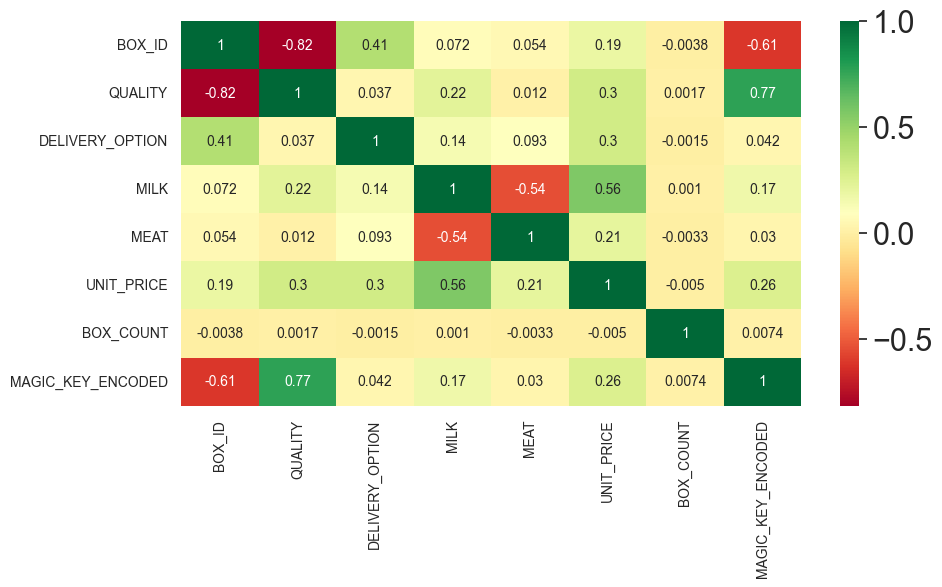

In [11]:
sns.set(font_scale = 2)
plt.subplots(figsize = (10, 5))
heat_plot = sns.heatmap(df_encoded.corr(method = 'pearson'), annot = True, cmap = 'RdYlGn', annot_kws={'size': 10})

plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)

plt.show()

In [12]:
correlation = df_encoded.corr(method = 'pearson') #finding all correlation between each features
print(correlation['BOX_ID'].sort_values(ascending = False).to_string()) #printing correlation with class in descending order

BOX_ID               1.000000
DELIVERY_OPTION      0.408524
UNIT_PRICE           0.188652
MILK                 0.072247
MEAT                 0.054362
BOX_COUNT           -0.003785
MAGIC_KEY_ENCODED   -0.614492
QUALITY             -0.816143


In [13]:
from sklearn.utils import shuffle #importing the suffle module
shuffled_df = shuffle(df_encoded)
shuffled_df #checking

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,BOX_COUNT,MAGIC_KEY_ENCODED
527502,143,1.0,2.0,16.0,1.8,19.98,1,730348
41011,12,1.0,1.0,8.0,1.5,12.98,1,535793
967229,258,0.0,2.0,8.0,2.2,17.98,1,67465
207709,89,1.0,2.0,10.0,0.0,12.18,1,1002413
213145,94,1.0,2.0,0.0,2.4,13.96,1,567935
...,...,...,...,...,...,...,...,...
806515,228,0.0,2.0,8.3,0.0,9.96,1,15292
10534,4,1.0,1.0,0.0,2.5,11.96,1,325230
276622,106,1.0,2.0,0.0,3.3,15.96,1,617255
410615,132,1.0,2.0,9.0,1.8,19.98,1,637022


In [14]:
#rearranging the index value
rearranged_df = shuffled_df.reset_index(drop = True)
rearranged_df

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,BOX_COUNT,MAGIC_KEY_ENCODED
0,143,1.0,2.0,16.0,1.8,19.98,1,730348
1,12,1.0,1.0,8.0,1.5,12.98,1,535793
2,258,0.0,2.0,8.0,2.2,17.98,1,67465
3,89,1.0,2.0,10.0,0.0,12.18,1,1002413
4,94,1.0,2.0,0.0,2.4,13.96,1,567935
...,...,...,...,...,...,...,...,...
1048931,228,0.0,2.0,8.3,0.0,9.96,1,15292
1048932,4,1.0,1.0,0.0,2.5,11.96,1,325230
1048933,106,1.0,2.0,0.0,3.3,15.96,1,617255
1048934,132,1.0,2.0,9.0,1.8,19.98,1,637022


In [15]:
X = rearranged_df.drop(columns = ['BOX_ID']) #dropping the class collumn to separate the feature
X

,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,BOX_COUNT,MAGIC_KEY_ENCODED
0,1.0,2.0,16.0,1.8,19.98,1,730348
1,1.0,1.0,8.0,1.5,12.98,1,535793
2,0.0,2.0,8.0,2.2,17.98,1,67465
3,1.0,2.0,10.0,0.0,12.18,1,1002413
4,1.0,2.0,0.0,2.4,13.96,1,567935
...,...,...,...,...,...,...,...
1048931,0.0,2.0,8.3,0.0,9.96,1,15292
1048932,1.0,1.0,0.0,2.5,11.96,1,325230
1048933,1.0,2.0,0.0,3.3,15.96,1,617255
1048934,1.0,2.0,9.0,1.8,19.98,1,637022


In [16]:
y =  rearranged_df['BOX_ID'] #separating target to y
y

0          143
1           12
2          258
3           89
4           94
          ... 
1048931    228
1048932      4
1048933    106
1048934    132
1048935    203
Name: BOX_ID, Length: 1048936, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split #importing module
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) #80-20% split

In [18]:
print(len(X_train)) #checking
print(len(X_test))

839148
209788


In [19]:
print(len(y_train)) #checking
print(len(y_test))

839148
209788


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
tree_clf = DecisionTreeClassifier(max_depth = 5, random_state = 42)
tree_clf.fit(X, y)
tree_clf.feature_importances_

array([0.09874885, 0.01144578, 0.34975515, 0.25625253, 0.28379769,
       0.        , 0.        ])

In [69]:
#creating instance of decision tree, depth 2
tree_clf = DecisionTreeClassifier(max_depth = 15, random_state = 42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

In [70]:
y_pred = tree_clf.predict(X_test)

In [71]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9954525521002154

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
maxdepth = range(1, 31)
scores = []
for d in maxdepth:
    dt = DecisionTreeClassifier(max_depth = d, random_state = 42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

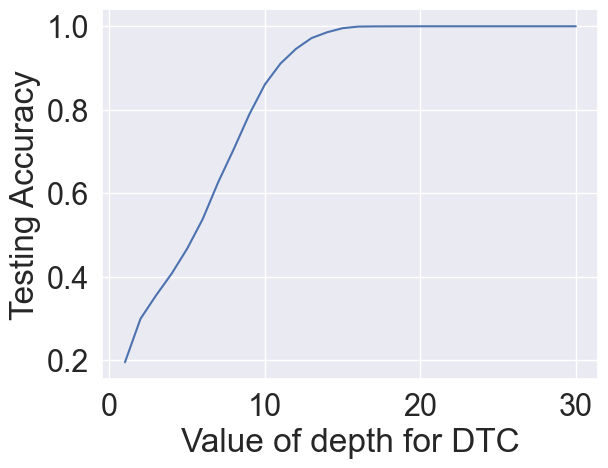

In [81]:
import matplotlib.pyplot as plt #importing marplotlib
#for showing inline
%matplotlib inline 


plt.plot(maxdepth, scores) #defining axis

plt.xlabel("Value of depth for DTC") #labeling the x-axis
plt.ylabel("Testing Accuracy") #labeling the y-axis

In [82]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50, criterion="entropy", random_state = 42, n_jobs = -1, max_leaf_nodes = 2**20, max_features = 3)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=3,
                       max_leaf_nodes=1048576, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [83]:
y_pred = classifier.predict(X_test)

In [84]:
metrics.accuracy_score(y_test, y_pred)

0.9999523328312392

In [28]:
df_feb = pd.read_csv('Datasets/test.csv')

In [29]:
df_feb

,MAGIC_KEY,BOX_ID
0,2C15B86534E,99.0
1,29D969045C2,238.0
2,2A00DE30F46,204.0
3,291C04B5CBF,231.0
4,2955110718F,238.0
...,...,...
180767,2CBCE0DA1CF,9.0
180768,2C36487A3C5,126.0
180769,2BF041E89A9,138.0
180770,2C26890A7CD,51.0


In [30]:
df = df.drop(columns = ['BOX_ID'])
df

,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,MAGIC_KEY,BOX_COUNT,MAGIC_KEY_ENCODED
0,1.0,1.0,0.0,2.3,11.96,2BC4127366C,1,298333
1,1.0,1.0,0.0,2.3,11.96,2BC4394CE95,1,298785
2,1.0,1.0,0.0,2.3,11.96,2BC4D37C804,1,300413
3,1.0,1.0,0.0,2.3,11.96,2BC4EA26F92,1,300652
4,1.0,1.0,0.0,2.3,11.96,2BC4F73408A,1,300851
...,...,...,...,...,...,...,...,...
1048931,0.0,0.0,0.0,3.6,15.96,28E5FB5E7BF,1,56388
1048932,0.0,0.0,0.0,3.6,15.96,293C58DD9DC,1,209777
1048933,0.0,0.0,0.0,3.6,15.96,29E6A06C99B,1,274281
1048934,0.0,0.0,0.0,3.6,15.96,2A0CABFA0DF,1,287489


In [31]:
df_test = pd.merge(df_feb, df, on = 'MAGIC_KEY')
df_test

,MAGIC_KEY,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,BOX_COUNT,MAGIC_KEY_ENCODED
0,2C15B86534E,99.0,1.0,2.0,0.0,2.7,11.96,1,526306
1,29D969045C2,238.0,0.0,2.0,10.7,0.0,12.78,1,268360
2,2A00DE30F46,204.0,0.0,1.0,10.2,0.0,12.18,1,282936
3,291C04B5CBF,231.0,0.0,2.0,10.0,0.0,12.18,1,183685
4,2955110718F,238.0,0.0,2.0,10.7,0.0,12.78,1,222638
...,...,...,...,...,...,...,...,...,...
180767,2CBCE0DA1CF,9.0,1.0,1.0,10.0,0.0,12.18,1,883431
180768,2C36487A3C5,126.0,1.0,2.0,8.0,1.5,15.98,1,600091
180769,2BF041E89A9,138.0,1.0,2.0,10.0,1.8,19.98,1,434093
180770,2C26890A7CD,51.0,1.0,2.0,18.0,2.9,23.98,1,565276


In [32]:
df_test = df_test.drop(columns = ['MAGIC_KEY'])
df_test

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,BOX_COUNT,MAGIC_KEY_ENCODED
0,99.0,1.0,2.0,0.0,2.7,11.96,1,526306
1,238.0,0.0,2.0,10.7,0.0,12.78,1,268360
2,204.0,0.0,1.0,10.2,0.0,12.18,1,282936
3,231.0,0.0,2.0,10.0,0.0,12.18,1,183685
4,238.0,0.0,2.0,10.7,0.0,12.78,1,222638
...,...,...,...,...,...,...,...,...
180767,9.0,1.0,1.0,10.0,0.0,12.18,1,883431
180768,126.0,1.0,2.0,8.0,1.5,15.98,1,600091
180769,138.0,1.0,2.0,10.0,1.8,19.98,1,434093
180770,51.0,1.0,2.0,18.0,2.9,23.98,1,565276


In [33]:
df_test_X = df_test.drop(columns = ['BOX_ID'])
df_test_X

,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,BOX_COUNT,MAGIC_KEY_ENCODED
0,1.0,2.0,0.0,2.7,11.96,1,526306
1,0.0,2.0,10.7,0.0,12.78,1,268360
2,0.0,1.0,10.2,0.0,12.18,1,282936
3,0.0,2.0,10.0,0.0,12.18,1,183685
4,0.0,2.0,10.7,0.0,12.78,1,222638
...,...,...,...,...,...,...,...
180767,1.0,1.0,10.0,0.0,12.18,1,883431
180768,1.0,2.0,8.0,1.5,15.98,1,600091
180769,1.0,2.0,10.0,1.8,19.98,1,434093
180770,1.0,2.0,18.0,2.9,23.98,1,565276


In [35]:
df_test_y = df_test['BOX_ID']
df_test_y

0          99.0
1         238.0
2         204.0
3         231.0
4         238.0
          ...  
180767      9.0
180768    126.0
180769    138.0
180770     51.0
180771    246.0
Name: BOX_ID, Length: 180772, dtype: float64

In [72]:
y_pred = tree_clf.predict(df_test_X)
y_pred

array([ 78, 238, 203, ..., 134, 174, 246], dtype=int64)

In [73]:
metrics.accuracy_score(df_test_y, y_pred)

0.3004281636536632

In [85]:
y_pred = classifier.predict(df_test_X)
y_pred

array([ 78, 238, 203, ..., 134, 174, 246], dtype=int64)

In [86]:
metrics.accuracy_score(df_test_y, y_pred)

0.3003562498617042

In [74]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, y_train)
    train_acc = 1 - model.score(X_train, y_train)
    val_acc = 1 - model.score(X_test, y_test)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [75]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: total: 1min 16s
Wall time: 1min 38s


In [76]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.806723,0.805327
1,2,0.702422,0.701017
2,3,0.647109,0.644951
3,4,0.594595,0.593046
4,5,0.535407,0.533100
5,6,0.464385,0.462124
6,7,0.375182,0.373448
7,8,0.297069,0.294278
8,9,0.212891,0.211037
9,10,0.140882,0.139384
